In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_datareader import data



In [35]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

In [36]:
# to get timeseries from the web 
def get_assets(tickers, startdate=datetime(2000,1,1), enddate=datetime(2019,11,15), datatype="Adj Close"):
    print("+++ Loading assets tickers from the web +++")
    assets = pd.DataFrame()
    for i,asset_name in enumerate(tickers):
        print("\r    loading {} ({}/{})".format(asset_name,i+1,len(tickers)), end="")
        assets[asset_name] = data.DataReader(asset_name, data_source="yahoo", start=startdate, end=enddate)[datatype]    
    print("\nLoad succesful")
    return assets

In [83]:
# example
startdate = datetime(2005,1,3) 
enddate   = datetime(2020,3,10)
tickers   = ["BBVA"] 
assets    = get_assets(tickers, startdate=startdate, enddate=enddate)

+++ Loading assets tickers from the web +++
    loading BBVA (1/1)
Load succesful


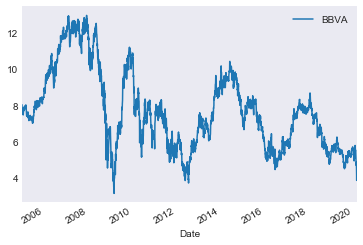

In [84]:
assets.plot()

In [85]:
name = "dividendos_REP.csv"
file = "/Users/mariacristinasampaolo/Documents/python/git-tracked/finance-courses/data/" + name
div = pd.read_csv(file, sep=";", header=None, parse_dates=[0]+[i for i in range(4,61+1,3)])
div = div.set_index(0,drop=True)
div = div.dropna(axis=1, how='all')
div = div.drop(columns=[1])
div = div.drop(columns=[i for i in range(6,63+1,3)])
# rename columns appropriately 
cols = [ ["date div {}".format(i),"div {}".format(i)] for i in range(1,int((div.shape[1]-2)/2)+1) ]
cols = [ item for sublist in cols for item in sublist]
cols = ["underlying","no. divs"] + cols
div.columns = cols
div.index.name = "session"

# sort dataframe by date session 
div = div.sort_index(axis=0)
# make sure sort by index date is doing right
for i in range(len(div.index)-1):
    if div.index[i] > div.index[i+1]:
        raise ValueError("Dates not sorted correctly")
    
# convert dividends from str to num
for i in range(1,20+1):
    div["div {}".format(i)] = pd.to_numeric( div["div {}".format(i)].str.replace(",",".") )

In [86]:
div.tail()

,underlying,no. divs,date div 1,div 1,date div 2,div 2,date div 3,div 3,date div 4,div 4,...,date div 16,div 16,date div 17,div 17,date div 18,div 18,date div 19,div 19,date div 20,div 20
session,,,,,,,,,,,,,,,,,,,,,
2020-03-04,REP,20,2020-06-15,0.526,2020-12-21,0.44500,2021-06-14,0.55500,2021-12-13,0.44500,...,2027-12-13,0.44500,2028-06-13,0.55500,2028-12-13,0.44500,2029-06-13,0.55500,2029-12-13,0.44500
2020-03-05,REP,20,2020-06-15,0.526,2020-12-21,0.44500,2021-06-14,0.55500,2021-12-13,0.44500,...,2027-12-13,0.44500,2028-06-13,0.55500,2028-12-13,0.44500,2029-06-13,0.55500,2029-12-13,0.44500
2020-03-06,REP,20,2020-06-15,0.490,2020-12-18,0.41385,2021-06-14,0.51615,2021-12-13,0.41385,...,2027-12-13,0.41385,2028-06-13,0.51615,2028-12-13,0.41385,2029-06-13,0.51615,2029-12-13,0.41385
2020-03-09,REP,20,2020-06-15,0.490,2020-12-18,0.39316,2021-06-14,0.49034,2021-12-13,0.39316,...,2027-12-13,0.39316,2028-06-13,0.49034,2028-12-13,0.39316,2029-06-13,0.49034,2029-12-13,0.39316
2020-03-10,REP,20,2020-06-15,0.490,2020-12-18,0.37350,2021-06-14,0.46583,2021-12-13,0.37350,...,2027-12-13,0.37350,2028-06-13,0.46583,2028-12-13,0.37350,2029-06-13,0.46583,2029-12-13,0.37350


In [89]:
name = "closep_REP.csv"
file = "/Users/mariacristinasampaolo/Documents/python/git-tracked/finance-courses/data/" + name
cprice_REP = pd.read_csv(file, sep=";", header=None, index_col=0)
# convert prices from sting to numeric
cprice_REP["close"] = pd.to_numeric( cprice_REP[2].str.replace(",",".") )
cprice_REP = cprice_REP.drop(columns=[1,2])
# set index
cprice_REP.index = pd.to_datetime(cprice_REP.index, dayfirst=True)
cprice_REP.index.name = "session"
# put the right price for this date (original value is 1425.5)
cprice_REP["close"]["2020-01-13"] = 14.245

In [90]:
cprice_REP.head()

,close
session,
2005-01-03,19.20
2005-01-04,19.16
2005-01-05,18.85
2005-01-07,18.88
2005-01-10,18.90


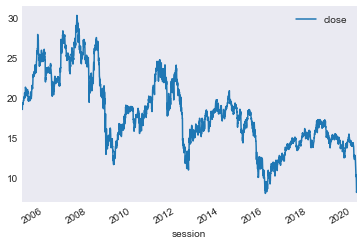

In [91]:
cprice_REP.plot()